<a href="https://colab.research.google.com/github/sankalpvarshney/DemoDeploymentProject-1/blob/master/convert_facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First, download Hiroki Taniai's Keras Facenet repository 

In [1]:
!rm -rf /content/keras-facenet/

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
 pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
asgiref==3.3.1
astor==0.8.1
astropy==4.2
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
bz2file==0.98
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3

In [ ]:
# Uncomment this cell if you need to use it with an older release of TF
!pip install tensorflow==1.13.1
 import tensorflow as tf
# print(tf.__version__)

  Using cached https://files.pythonhosted.org/packages/77/63/a9fa76de8dffe7455304c4ed635be4aa9c0bacef6e0633d87d5f54530c5c/tensorflow-1.13.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0f/39/bdd75b08a6fba41f098b6cb091b9e8c7a80e1b4d679a581a0ccd17b10373/tensorboard-1.13.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/48/13f49fc3fa0fdf916aa1419013bb8f2ad09674c275b4046d5ee669a46873/tensorflow_estimator-1.13.0-py2.py3-none-any.whl
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [4]:
# %tensorflow_version 1.x
%cd /content/

# delete unnecessary dir
!rm -rf sample_data

# clone Hiroki's repo
!git clone https://github.com/nyoki-mtl/keras-facenet

# patch inception_resnet_v1 to add normalization
%cd /content/keras-facenet/code/
!rm inception_resnet_v1.py
!wget https://raw.githubusercontent.com/estebanuri/face_recognition/master/python/models/hiroki/inception_resnet_v1.py


/content
Cloning into 'keras-facenet'...
remote: Enumerating objects: 57, done.
remote: Total 57 (delta 0), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (57/57), done.
/content/keras-facenet/code
--2021-03-04 14:51:08--  https://raw.githubusercontent.com/estebanuri/face_recognition/master/python/models/hiroki/inception_resnet_v1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10166 (9.9K) [text/plain]
Saving to: ‘inception_resnet_v1.py’

inception_resnet_v1 100%[===================>]   9.93K  --.-KB/s    in 0s      

2021-03-04 14:51:08 (103 MB/s) - ‘inception_resnet_v1.py’ saved [10166/10166]



# Now download the TensorFlow pre-trained FaceNet model from davidsandberg's facenet implementation

In [5]:
# create a dir for tf model
%cd /content/keras-facenet/

# download pre-trained model from davidsandberg's facenet implementation
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-" -O /content/keras-facenet/model/tf.zip && rm -rf /tmp/cookies.txt

#unzip the model, and delete zip file
%cd /content/keras-facenet/model/
!ls -lh tf.zip 
!unzip tf.zip
!rm tf.zip

!mv 20180402-114759 tf


/content/keras-facenet
--2021-03-04 14:51:18--  https://docs.google.com/uc?export=download&confirm=FZB5&id=1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-
Resolving docs.google.com (docs.google.com)... 74.125.203.101, 74.125.203.139, 74.125.203.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-4k-docs.googleusercontent.com/docs/securesc/7eujn9qk6cc390ril85s37hrsdk9gv6m/0si2cloccu13i48rs1t4ks4e0iprqu54/1614869475000/18056234690049221457/17826563989946091096Z/1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-?e=download [following]
--2021-03-04 14:51:19--  https://doc-00-4k-docs.googleusercontent.com/docs/securesc/7eujn9qk6cc390ril85s37hrsdk9gv6m/0si2cloccu13i48rs1t4ks4e0iprqu54/1614869475000/18056234690049221457/17826563989946091096Z/1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-?e=download
Resolving doc-00-4k-docs.googleusercontent.com (doc-00-4k-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:

# Creates working directories

In [6]:
import os
import re
import numpy as np
import tensorflow as tf

import sys
base_dir = "/content/keras-facenet"
sys.path.append(base_dir + '/code/')
from inception_resnet_v1 import *

tf_model_dir = base_dir + '/model/tf/'
npy_weights_dir = base_dir + '/model/keras/npy_weights/'
weights_dir = base_dir + '/model/keras/weights/'
model_dir = base_dir + '/model/keras/model/'

weights_filename = 'facenet_keras_weights.h5'
model_filename = 'facenet_keras.h5'

os.makedirs(npy_weights_dir, exist_ok=True)
os.makedirs(weights_dir, exist_ok=True)
os.makedirs(model_dir, exist_ok=True)



In [7]:
# regex for renaming the tensors to their corresponding Keras counterpart
re_repeat = re.compile(r'Repeat_[0-9_]*b')
re_block8 = re.compile(r'Block8_[A-Za-z]')

def get_filename(key):
    filename = str(key)
    filename = filename.replace('/', '_')
    filename = filename.replace('InceptionResnetV1_', '')

    # remove "Repeat" scope from filename
    filename = re_repeat.sub('B', filename)

    if re_block8.match(filename):
        # the last block8 has different name with the previous 5 occurrences
        filename = filename.replace('Block8', 'Block8_6')

    # from TF to Keras naming
    filename = filename.replace('_weights', '_kernel')
    filename = filename.replace('_biases', '_bias')

    return filename + '.npy'


def extract_tensors_from_checkpoint_file(filename, output_folder):
    reader = tf.compat.v1.train.NewCheckpointReader(filename)

    for key in reader.get_variable_to_shape_map():
        # not saving the following tensors
        if key == 'global_step':
            continue
        if 'AuxLogit' in key:
            continue

        # convert tensor name into the corresponding Keras layer weight name and save
        path = os.path.join(output_folder, get_filename(key))
        arr = reader.get_tensor(key)
        np.save(path, arr)

In [8]:
extract_tensors_from_checkpoint_file(tf_model_dir+'model-20180402-114759.ckpt-275', npy_weights_dir)

In [9]:
model = InceptionResNetV1Norm(classes=512)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    

# Write the weights into Keras model

In [10]:
print('Loading numpy weights from', npy_weights_dir)
for layer in model.layers:
    if layer.weights:
        weights = []
        for w in layer.weights:
            print(w.name)
            weight_name = os.path.basename(w.name).replace(':0', '')
            weight_file = layer.name + '_' + weight_name + '.npy'
            weight_arr = np.load(os.path.join(npy_weights_dir, weight_file))
            weights.append(weight_arr)
        layer.set_weights(weights)

print('Saving weights...')
model.save_weights(os.path.join(weights_dir, weights_filename))
print('Saving model...')
model.save(os.path.join(model_dir, model_filename))

Loading numpy weights from /content/keras-facenet/model/keras/npy_weights/
Conv2d_1a_3x3/kernel:0
Conv2d_1a_3x3_BatchNorm/beta:0
Conv2d_1a_3x3_BatchNorm/moving_mean:0
Conv2d_1a_3x3_BatchNorm/moving_variance:0
Conv2d_2a_3x3/kernel:0
Conv2d_2a_3x3_BatchNorm/beta:0
Conv2d_2a_3x3_BatchNorm/moving_mean:0
Conv2d_2a_3x3_BatchNorm/moving_variance:0
Conv2d_2b_3x3/kernel:0
Conv2d_2b_3x3_BatchNorm/beta:0
Conv2d_2b_3x3_BatchNorm/moving_mean:0
Conv2d_2b_3x3_BatchNorm/moving_variance:0
Conv2d_3b_1x1/kernel:0
Conv2d_3b_1x1_BatchNorm/beta:0
Conv2d_3b_1x1_BatchNorm/moving_mean:0
Conv2d_3b_1x1_BatchNorm/moving_variance:0
Conv2d_4a_3x3/kernel:0
Conv2d_4a_3x3_BatchNorm/beta:0
Conv2d_4a_3x3_BatchNorm/moving_mean:0
Conv2d_4a_3x3_BatchNorm/moving_variance:0
Conv2d_4b_3x3/kernel:0
Conv2d_4b_3x3_BatchNorm/beta:0
Conv2d_4b_3x3_BatchNorm/moving_mean:0
Conv2d_4b_3x3_BatchNorm/moving_variance:0
Block35_1_Branch_2_Conv2d_0a_1x1/kernel:0
Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm/beta:0
Block35_1_Branch_2_Conv2d_0a_

# Finally convert Keras -> TFLite

In [11]:
!tflite_convert --post_training_quantize  --output_file facenet.tflite --keras_model_file /content/keras-facenet/model/keras/model/facenet_keras.h5


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0304 14:56:51.789296 139847917041536 deprecation.py:506] From /tensorflow-1.15.2/python3.7/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0304 14:56:51.789764 139847917041536 deprecation.py:506] From /tensorflow-1.15.2/python3.7/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the construc

# Let's see how the model has shrunk

In [13]:
#!ls /content/keras-facenet/model/keras/model/facenet_keras.h5
#!rm facenet.tflite
!ls -lh facenet.tflite


-rw-r--r-- 1 root root 23M Mar  4 14:57 facenet.tflite


# Now check that the model works OK

In [14]:
# for face detection
!pip install mtcnn

     |████████████████████████████████| 2.3MB 5.3MB/s 


# Here I load 3 images (2 from Bill Gates, and 1 from Larry Page)

Using TensorFlow backend.


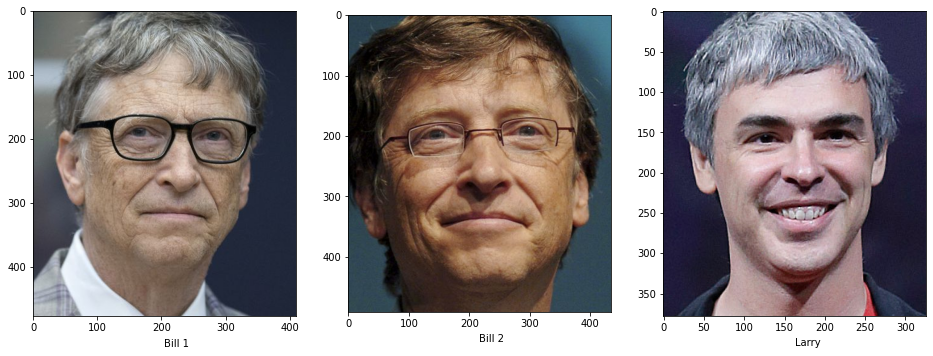

In [15]:
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

def read_image(file):
  img = cv2.imread(file)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

def crop_bb(image, detection, margin):
    x1, y1, w, h = detection['box']
    x1 -= margin
    y1 -= margin
    w += 2*margin
    h += 2*margin
    if x1 < 0:
        w += x1
        x1 = 0
    if y1 < 0:
        h += y1
        y1 = 0
    return image[y1:y1+h, x1:x1+w]

def crop(mtcnn, img):
  det = mtcnn.detect_faces(img)[0]
  margin = int(0.1 * img.shape[0])
  ret = crop_bb(img, det, margin)
  return ret

base_dir = "/content/keras-facenet/data/images"

bill1 = read_image(base_dir + "/BillGates/Bill_Gates_0001.jpg")
bill2 = read_image(base_dir + "/BillGates/Bill_Gates_0002.jpg")
larry = read_image(base_dir + "/LarryPage/Larry_Page_0001.jpg")

#crops the faces
mtcnn = MTCNN()
bill1 = crop(mtcnn, bill1)
bill2 = crop(mtcnn, bill2)
larry = crop(mtcnn, larry)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 8)
ax1.imshow(bill1)
ax1.text(0.5,-0.1,"Bill 1", transform=ax1.transAxes)
ax2.imshow(bill2)
ax1.text(0.5,-0.1,"Bill 2", transform=ax2.transAxes)
ax3.imshow(larry)
ax1.text(0.5,-0.1,"Larry", transform=ax3.transAxes)

plt.show()

# Here I compare its embeedings distances using the TFLite model

In [16]:
def pre_process(face, required_size=(160, 160)):

    ret = cv2.resize(face, required_size)
    #ret = cv2.cvtColor(ret, cv2.COLOR_BGR2RGB)
    ret = ret.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = ret.mean(), ret.std()
    ret = (ret - mean) / std

    return ret

def load_tflite_model(file):
    # Load the TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path=file)
    interpreter.allocate_tensors()
    return interpreter

def predict(face_model, samples):
    # Get input and output tensors.
    input_details = face_model.get_input_details()
    output_details = face_model.get_output_details()

    # Test the model on random input data.
    input_shape = input_details[0]['shape']

    #input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    outputs = []
    for sample in samples:
        input_data = sample.reshape(input_shape)
        #input_data = np.expand_dims(input_data, axis=0)
        face_model.set_tensor(input_details[0]['index'], input_data)
        face_model.invoke()
        # The function `get_tensor()` returns a copy of the tensor data.
        # Use `tensor()` in order to get a pointer to the tensor.
        output_data = face_model.get_tensor(output_details[0]['index'])
        #print(output_data)
        outputs.append(output_data)
    ret = np.stack(outputs)
    return ret


imgs = [bill1, bill2, larry]
samples = [pre_process(i) for i in imgs]

# load tfl model
tfl_file = "/content/keras-facenet/model/facenet.tflite"
tflite_model = load_tflite_model(tfl_file)

embeddings = predict(tflite_model, samples)

print("distance bill vs bill", np.linalg.norm(embeddings[0, :] - embeddings[1, :]))
print("distance bill vs larry", np.linalg.norm(embeddings[0, :] - embeddings[2, :]))

distance bill vs bill 0.7266881
distance bill vs larry 1.2134411
